# PYTHON DATA ANALYSIS - LINKEDIN

## Chapter 5

In [ ]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# With URLlib we can download the datafiles
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt','ghcn_readme.txt')

In [ ]:
# With URLlib we can download the datafiles
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [ ]:
# WIth numpy we can read structured (fixed field width) TXT data, without separator chacraters.
stations = np.genfromtxt('stations.txt',delimiter=[11,9,10,7,3,31,4,4,6],
                        names=['id','lat','long','elev','state','name','gsn','hcn','wmo'],
                        dtype=['U11','d','d','d','U3','U31','U4','U4','U6',],autostrip=True)

In [ ]:
len(stations)

In [ ]:
#Lets see the longitude, and lttitude on a plot, this wil results some kind of map :)
plt.plot(stations['long'],stations['lat'],'.',markersize=1)

In [ ]:
# Lest see the "map" for one state only 
stations_ca = stations[stations['state'] == 'CA']
plt.plot(stations_ca['long'],stations_ca['lat'],'.',markersize=1)

In [ ]:
# Now lets take a more narroww slice:
stations[stations['name'] == 'PASADENA']

In [ ]:
# If we eant to find all stations, which has PASADEN  (and other chars may as well) in its 'name' we need np.char.find
# if we want exclude we need == -1 instead if == 0.
stations[np.char.find(stations['name'],'PASADENA') == 0]

In [ ]:
# Now lets query PASADENA data from the net
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly','PASADENA.dly')

In [ ]:
# An own-developed (by the video author) module to analyse data
import getweather

In [ ]:
# Lets check the own-dveloped modules GETYEAR function.
help(getweather.getyear)

In [ ]:
# Lest run and check this function
getweather.getyear('PASADENA',['TMIN','TMAX'],2000)

In [23]:
# to allow us to work further, we out this into a variable
pasadena = getweather.getyear('PASADENA',['TMIN','TMAX'],2001)

In [24]:
# Lest see some descriptive values
np.mean(pasadena['TMIN']),np.min(pasadena['TMIN']),np.max(pasadena['TMIN'])

(nan, nan, nan)

In [25]:
# Indeed in the data there is a lot of nan....
# How we could know, how many nan-s we have?
# with a trick:
# - with the isnan() functrion we create a boolean array with True/False elements
# - we can sum() the booleans, where true=1, false=0, so all nan will conuted as 1, 
# and their sum is the number of nan-s in our array
np.sum(np.isnan(pasadena['TMIN']))

15

In [28]:
# The nan-s are so frequent, that there is a nan version of themain function ins numpy,
# which ignore the nan values:
np.nanmin(pasadena['TMIN']),np.nanmax(pasadena['TMAX'])

(2.2, 41.1)

In [30]:
# To eleminate this problem, we need a bit of fnacy indexing:
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN'])
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX'])

In [ ]:
pasadena['TMIN']

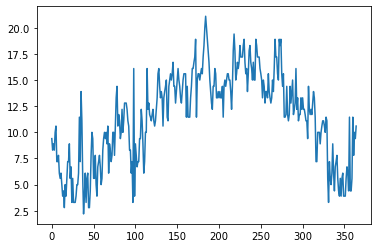

In [32]:
plt.plot(pasadena['TMIN'])